In [171]:
# Displaying the correct A matrix for each type : Forward. Central, Backward
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
from scipy.misc import derivative


# Given parameters
n = 5  # Number of points in the stencil
l = 3  # Position of the derivative in the stencil (central for 5-point)
d = 1  # Derivative order

a = [j - l for j in range(1, n + 1)]  # Relative positions of stencil points

# Construct matrix A (Vandermonde-like matrix)
A = [[a[j]**i for j in range(n)] for i in range(n)]

# Construct vector b (condition vector)
b = [math.factorial(d) if i == d else 0 for i in range(n)]

# Display matrices A and b
A, b

([[1, 1, 1, 1, 1],
  [-2, -1, 0, 1, 2],
  [4, 1, 0, 1, 4],
  [-8, -1, 0, 1, 8],
  [16, 1, 0, 1, 16]],
 [0, 1, 0, 0, 0])

Matrices A and b are displayed correctly.

In [172]:
A_inv = np.linalg.inv(A)

In [173]:
h = 1

# computing the stenctil coefficients c1,c2,..... (given in text as a,b,c.....)
D = 1/h**d * np.dot(A_inv, b)

D

array([ 8.33333333e-02, -6.66666667e-01,  2.37904934e-16,  6.66666667e-01,
       -8.33333333e-02])

In [174]:
def returnStencilCoefficients(n,l,d,h):
    a = [j - l for j in range(1, n + 1)]  # Relative positions of stencil points
    # Construct matrix A (Vandermonde-like matrix)
    A = [[a[j]**i for j in range(n)] for i in range(n)]
    # Construct vector b (condition vector)
    b = [math.factorial(d) if i == d else 0 for i in range(n)]
        
    A_inv = np.linalg.inv(A)
    
    # h = 0.1 

    # computing the stenctil coefficients c1,c2,..... (given in text as a,b,c.....)
    D = 1/h**d * np.dot(A_inv, b)
        
    return D

In [175]:
returnStencilCoefficients(n=3,l=1,d=1,h=1)

array([-1.5,  2. , -0.5])

Calculations are correct till the evaluation of D,A and b (Tested with cases from lecture notes)

In [176]:
# Evaluation of e^x using this method
# we have evaluation point
x_val = 0 
 
x = [x_val - 2*h, x_val -1*h, x_val, x_val+h, x_val+2*h]
fx = np.exp(x)

derivative = np.dot(D, np.transpose(fx))
derivative

0.9624581902172318

Correct derivative functioning established

### Question 2: Creating a generalised approach

In [177]:
a = -0.5
b = 0.5
N = 10

x_val = np.linspace(a,b,N+1)
# print(x_val)

# or can be assessed as N+1 points on the grid, N=10
# then, h = 0.5-(-0.5)/10
# now proceed
h = (b-a)/N
# print(h)

fx_vals = np.exp(x_val)
# print(fx_vals)

f_prime = np.zeros(len(x_val))

We need to generate the f'(x) for each of the above 11 points

But, 3 point central difference can be applied only t

Text(0.5, 1.0, 'Both fn and deriv are e^x')

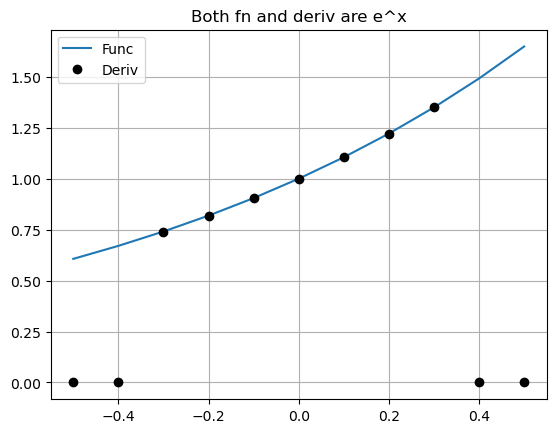

In [178]:
central_5_point_stencil = returnStencilCoefficients(5, (5+1)//2, 1, h)

#applying the 3 point scheme to the central elements
for i in range(2,len(fx_vals)-2): # leaving first and last ones out
    # temp_x = [round(x_val[k],2) for k in range(i-1,i+1+1)]
    # print(temp_x) 
    # properly being accessed
    
    temp_x = [fx_vals[k] for k in range(i-2,i+1+2)] # gives a 5-point array to calculate the derivative at current index
    
    f_prime[i] = np.dot(central_5_point_stencil, np.transpose(temp_x))
    
f_prime

plt.plot(x_val, fx_vals,"-" ,  label = "Func")
plt.plot(x_val, f_prime, "ok", label = "Deriv")
plt.legend()
plt.grid()
plt.title("Both fn and deriv are e^x")

Going in the right direction, but still **some deviation seems to exist**, very evident at lower values

Deviation eliminated in further trial, minor expression issue for central : (n+1/2) instead of the correct thing

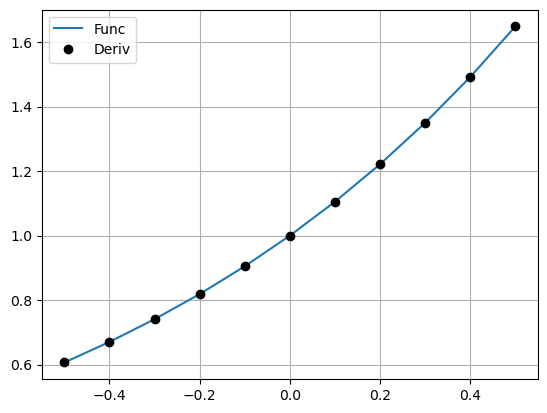

In [179]:
forward_5_point_stencil = returnStencilCoefficients(5, 1, 1, h)
for i in range(0,1+1): # first two only
    
    temp_x = [fx_vals[k] for k in range(i, i+5)] # gives a 5-point array to calculate the derivative at current index
    # print(temp_x)
    
    f_prime[i] = np.dot(forward_5_point_stencil, np.transpose(temp_x))
    
backward_5_point_stencil = returnStencilCoefficients(5, 5, 1, h)
for i in range(N-1,N+1): # first two only
    temp_x = [fx_vals[k] for k in range((i+1)-5, i+1)] # gives a 5-point array to calculate the derivative at current index
    
    f_prime[i] = np.dot(backward_5_point_stencil, np.transpose(temp_x))
    
plt.plot(x_val, fx_vals,"-" ,  label = "Func")
plt.plot(x_val, f_prime, "ok", label = "Deriv")
plt.legend()
plt.grid()


##### 2nd part SUCESSFULLY IMPLEMENTED, refining required, but values absolutely correct as verified by demo function e^x

### Question 3 - Implementation for the given specific function, and tallying the errors

1.0000000000000002
0.9999999999999999
0.9999999999999998
1.0000000000000002
1.0000000000000002
0.9999999999999996
1.0
0.9999999999999994
1.0000000000000004
1.0000000000000007
0.9999999999999994
1.0000000000000004
1.0000000000000007
0.9999999999999989
1.0000000000000009
0.9999999999999998
1.0


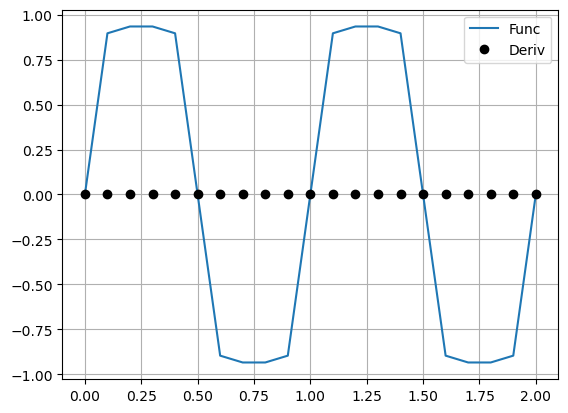

In [ ]:
# defining the given function
def f(x):
    sum = 0
    for k in range(1,5+1):
        sum = sum + (np.sin(2*np.pi*x* (2*k-1)))/(2*k - 1)
    
    sum = sum*(4/np.pi)
    return sum



N = 20 # for 201 points
x_val = np.linspace(0,2,N+1) # grid points
fx_vals = [f(x) for x in x_val] # function value at grid points‹

f_prime = np.zeros(len(fx_vals))
# Calculating the analytical derivative


# Implementation for n = [3, 5]

central_5_point_stencil = returnStencilCoefficients(5, (5+1)//2, 1, h)

for i in range(2,len(fx_vals)-2): # leaving first and last ones out
    temp_x = [x_val[k] for k in range(i-2,i+1+2)] # gives a 5-point array to calculate the derivative at current index
    f_prime[i] = np.dot(central_5_point_stencil, np.transpose(temp_x))
    

    
forward_5_point_stencil = returnStencilCoefficients(5, 1, 1, h)
for i in range(0,1+1): # first two only
    
    temp_x = [fx_vals[k] for k in range(i, i+5)] 
    f_prime[i] = np.dot(forward_5_point_stencil, np.transpose(temp_x))
        
backward_5_point_stencil = returnStencilCoefficients(5, 5, 1, h)
for i in range(N-1,N+1): # last two only
    temp_x = [fx_vals[k] for k in range((i+1)-5, i+1)] 
    f_prime[i] = np.dot(backward_5_point_stencil, np.transpose(temp_x))
        

plt.plot(x_val, fx_vals,"-" ,  label = "Func")
# plt.plot(x_val,f_prime_analytical, "-b", label ="Analytical Derivative")
plt.plot(x_val, f_prime, "ok", label = "Deriv")
plt.legend()
plt.grid()


        
    
    
